# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></div>

# Description

In this document we aim to elucidate empirically whether the soft-thresholding operation preserves the distribution of normal-random samples. Specifically, let
$$
X = (X_1, \ldots, X_n) \overset{iid}{\sim} \mathcal{N}(0, I_n)
$$
and define the soft-thresholding operator with threshold parameter $\lambda >0$ by 
$$
S_\lambda(y) = \mathrm{sgn}(y) \max (0, |y| - \lambda) 
$$
Then what is the distribution of $S_\lambda(X_j) \cdot \mathbb{1}(|X_j| > \lambda)$?

In [1]:
%pylab inline
import pdmse

Populating the interactive namespace from numpy and matplotlib
trying alternative import for spgl1...success!


In [2]:
n = 100000
lam = 1
Z = np.random.randn(n)
Y = pdmse.softThresh(Z, lam=lam)

In [3]:
X = Y[np.abs(Y) > 0]

In [4]:
X.shape

(31622,)

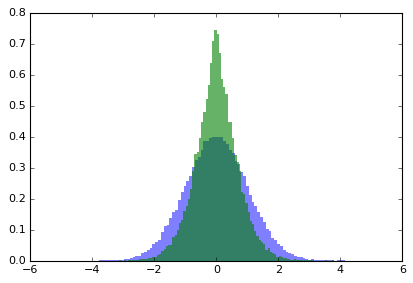

In [5]:
plt.hist(Z, bins=100, alpha=.5, lw=0, normed=True);
plt.hist(X, bins=100, alpha=.6, lw=0, normed=True);

Normalize the data:

In [6]:
XX = (X - X.mean())/X.std()

In [7]:
from statsmodels.graphics.gofplots import qqplot

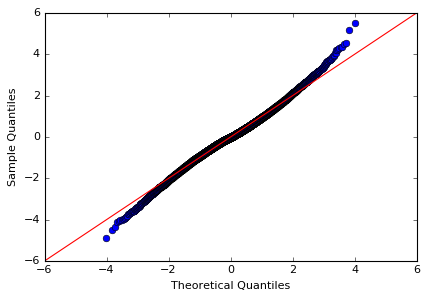

In [8]:
qqp = qqplot(XX, line='45');

There are many points and it looks curvy rather than straight. I do not think it is a normal distribution. 

In [9]:
from statsmodels.stats.diagnostic import normal_ad, lillifors

In [10]:
lillifors(XX)

(0.026643240696566317, 1.8769893238698485e-57)

In [11]:
normal_ad(XX)

(51.772722722376784, 0.0)

So the distribution is *definitely* **not** normal-random.